In [2]:
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns


In [3]:
df = pd.read_excel("yrbsqn.xlsx")

In [4]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,QN8,QN9,QN10,...,BMIPCT,RACEETH,Q6ORIG,Q7ORIG,QNDAYEVP,QNFREVP,QNDAYSKL,QNFRSKL,QNDAYCGR,QNFRCGR
0,5.0,2.0,3.0,2.0,E,1.90,108.86,2.0,2.0,2.0,...,97.44,5.0,603,240,2.0,2.0,2.0,2.0,2.0,2.0
1,7.0,2.0,3.0,1.0,NaN,1.60,58.97,2.0,2.0,2.0,...,60.88,6.0,503,130,2.0,2.0,2.0,2.0,2.0,2.0
2,5.0,1.0,3.0,1.0,A,1.65,64.41,2.0,2.0,2.0,...,78.50,7.0,505,142,2.0,2.0,2.0,2.0,2.0,2.0
3,6.0,1.0,3.0,1.0,NaN,1.60,64.86,2.0,2.0,2.0,...,84.61,6.0,503,143,2.0,2.0,2.0,2.0,2.0,2.0
4,7.0,2.0,3.0,2.0,E,1.75,65.77,2.0,2.0,2.0,...,40.08,5.0,509,145,2.0,2.0,2.0,2.0,2.0,2.0


In [5]:
df["WEIGHT"]

0        0.5497
1        0.3811
2        0.4238
3        0.4238
4        0.5497
5        0.6113
6        0.5497
7        0.8327
8        0.6113
9        0.3811
10       0.5497
11       0.5704
12       0.5497
13       0.5130
14       0.4238
15       0.5130
16       0.4238
17       0.6113
18       0.5130
19       0.6113
20       0.6113
21       0.4207
22       0.5497
23       0.4238
24       0.6113
25       0.7848
26       0.7848
27       0.5729
28       0.4803
29       0.3685
          ...  
14735    1.3453
14736    4.0560
14737    0.4915
14738    0.3279
14739    4.0560
14740    0.5388
14741    4.6643
14742    4.6643
14743    3.2297
14744    1.5470
14745    3.8609
14746    1.5470
14747    4.6719
14748    1.5470
14749    2.2948
14750    2.2948
14751    1.5483
14752    3.2198
14753    1.3761
14754    1.5470
14755    1.3772
14756    3.8490
14757    1.5470
14758    1.5483
14759    1.3761
14760    1.3772
14761    1.4605
14762    1.5483
14763    3.2268
14764    3.2268
Name: WEIGHT, Length: 14

## Question 1
1.  Is there a relationship between race and how much green salad one eats?

Race and Q72. During the past 7 days, did you eat salad? 

1 is no, 2 is yes



In [6]:
q1tb = pd.crosstab(df["QN78"], df["RACEETH"])
q1tb

RACEETH,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
QN78,,,,,,,,
1.0,16,65,326,13,646,212,288,112
2.0,89,500,1658,83,4409,1172,1548,543


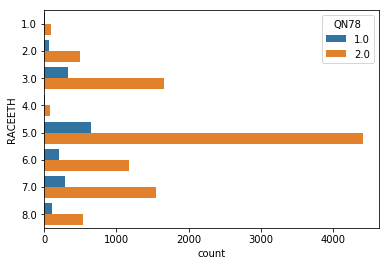

In [7]:
sns.countplot(data=df, hue="QN78", y="RACEETH")

In [8]:
chi2_contingency(q1tb)

(28.69973369569657,
 0.00016410870779412593,
 7,
 array([[  15.08476027,   81.17037671,  285.03013699,   13.79178082,
          726.2234589 ,  198.83150685,  263.76780822,   94.10017123],
        [  89.91523973,  483.82962329, 1698.96986301,   82.20821918,
         4328.7765411 , 1185.16849315, 1572.23219178,  560.89982877]]))

## Question 2

Compare the means of BMI percentile between Whites (5) and African Americans (7).


In [9]:
wBMI = df.loc[df["RACEETH"] == 5]["Q7"].dropna()
print("Mean: {0} \t Std Dev: {1}".format(wBMI.mean(), wBMI.std()))

Mean: 67.17433533963792 	 Std Dev: 17.135629044969008


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


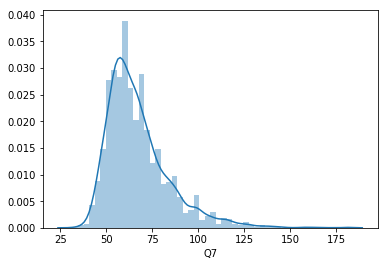

In [16]:
sns.distplot(wBMI)

In [10]:
bBMI = df.loc[df["RACEETH"] == 3]["Q7"].dropna()
print("Mean: {0} \t Std Dev: {1}".format(bBMI.mean(), bBMI.std()))

Mean: 70.15575020610032 	 Std Dev: 17.646670663879753


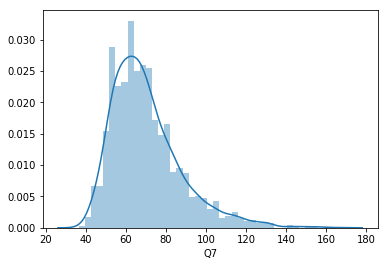

In [17]:
sns.distplot(bBMI)

## Question 3

Compare White's height to their BMI.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


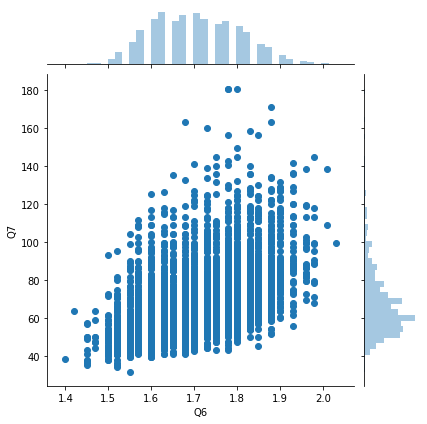

In [11]:
wHeight = df.loc[df["RACEETH"] == 5]["Q6"].dropna()

wWeight = df.loc[df["RACEETH"] == 5]["Q7"].dropna()
sns.jointplot(wHeight, wWeight)

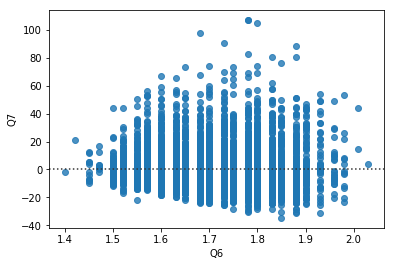

In [12]:
sns.residplot(wHeight, wWeight)

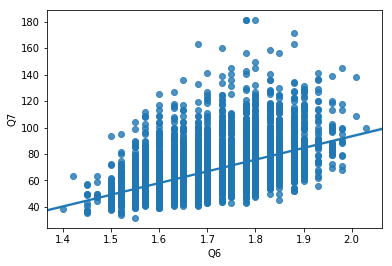

In [13]:
sns.regplot(wHeight, wWeight)

In [14]:
import numpy as np, statsmodels.api as sm

model_X = sm.add_constant(wHeight)
model_y = wWeight

mod = sm.OLS(model_y, model_X)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Q7   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     2145.
Date:                Wed, 05 Jun 2019   Prob (F-statistic):               0.00
Time:                        07:39:08   Log-Likelihood:                -23859.
No. Observations:                5815   AIC:                         4.772e+04
Df Residuals:                    5813   BIC:                         4.774e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -83.2230      3.253    -25.581      0.000     -89.601     -76.845
Q6            88.2856      1.906     46.310      0.000      84.548      92.023
==============================================================================
Omnibus:                     2092.238   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9030.042
Skew:                           1.723   Prob(JB):                         0.00
Kurtosis:                       8.039   Cond. No.                         38.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
res.conf_int(.05)

,0,1
const,-89.600599,-76.845359
Q6,84.548338,92.022802
